# Notebook | PhyNum : motifs au fond d'une piscine

## Import

In [1]:
from PhyNum import *

## Initialisations

In [2]:
u = np.array([0, 0, -1])  # direction de la lumière

theta = 0

Ry = np.array([[np.cos(theta), 0, np.sin(theta)],
                [0, 1, 0],
                [-np.sin(theta), 0, np.cos(theta)]])

u = Ry @ u



# Déplacement nécessaire des rayons en fonction de leur angle d'incidence (mesuré entre u et ux)
dux = (Lz-h)*np.tan(theta) * np.array([1, 0, 0])

rayons = []
for i in range(Nx+1-1):
    rayons.append([])
    for j in range(Ny+1-1):
        rayons[i].append((np.array([(i+1/2)*dx, (j+1/2)*dy, Lz]) + dux, u))


### Surface initiale

In [3]:


# Définition d'une surface d'eau
surface = h + a*np.sin(Kx*grille_X) * np.sin(Ky*grille_Y)

A = 0.1 # (bien pour 1/45)
# (utilisation du Perlin noise)
for i in range(Nx+1):
    for j in range(Ny+1):
        scale = 100 # 200
        surface[i][j] = h + A*noise.pnoise2(i/scale, j/scale, octaves=2)


# h0 = np.zeros((Nx+1, Ny+1), dtype=complex)
# integrande = np.zeros((Nx+1, Ny+1), dtype=complex)

# for i in range(Nx+1):
#     for j in range(Ny+1):
#         kx = i*dkx
#         ky = j*dky
#         h0[i, j] = random_h0(kx, ky, Ph_Phillips, np.array([1, 0]))

#         integrande[i, j] = h0[i, j] + np.conjugate(h0[-i, -j])

# surface = np.real(np.fft.ifft2(integrande))+h



## Calculs

In [4]:
trajectoires = calcul_trajectoires(rayons, surface)


Calcul des trajectoires : 100%|██████████| 300/300 [00:27<00:00, 10.80it/s]


In [5]:
motif = calcul_motifs(trajectoires)

motif = np.sqrt(motif)

image = motif_to_alpha(motif)
plt.imsave("caustiques Nx=" + str(Nx) + ".png", image)


## Affichage

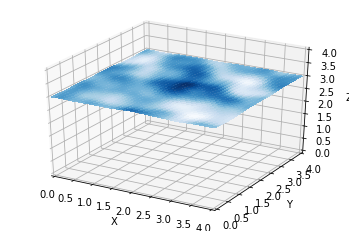

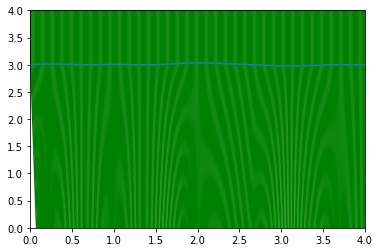

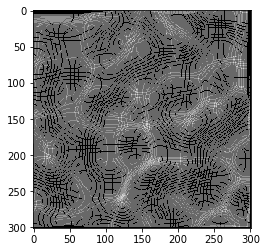

In [6]:
plot_surface(surface)
plt.show()


affiche_rayons(trajectoires, surface, save=True)
plt.show()


plt.imshow(motif, cmap='gray')
plt.show()


In [7]:
# h0 = np.fft.fft2(surface-h)

# genere_animation_simple(surface, h0, rayons, save_motif=False)


In [8]:

# images = [Image.open(f"Frames/frame{n}.png") for n in range(frames)]

# images[0].save('wave Nx='+ str(Nx) + '.gif', save_all=True,
#                 append_images=images[1:], duration=dt*10**3, loop=0)
    
# images = [Image.open(f"Frames/frame {n} image.png") for n in range(frames)]

# images[0].save('caustiques dynamique Nx=' + str(Nx) + '.gif', save_all=True,
#                    append_images=images[1:], duration=dt*10**3, loop=0)
